In [3]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"C:\Users\hhuan\TemparatureStudy\vertical-jetty-291800-46b4a02fef85.json"
from google.cloud import bigquery
import pandas
import pandas as pd
import matplotlib.pyplot as plt
client = bigquery.Client()

In [18]:
query_job = client.query(
    """
    SELECT  *
    FROM `bigquery-public-data.noaa_gsod.stations` 
    """
)

results = query_job.result()  # Waits for job to complete.

In [19]:
df_station=results.to_dataframe()

In [6]:
df_station=df_station[df_station['end']>'20200101']
df_station

,usaf,wban,name,country,state,call,lat,lon,elev,begin,end
25,031620,99999,ESKDALEMUIR,UK,None,None,55.317,-3.200,+0242.0,19291001,20210916
46,039520,99999,ROCHES POINT,EI,None,None,51.800,-8.250,+0041.0,19291001,20210913
48,060110,99999,TORSHAVN,DA,None,None,62.017,-6.767,+0061.0,19310103,20210701
55,070570,99999,CREIL,FR,None,LFPC,49.254,2.519,+0088.7,19400713,20210728
57,070590,99999,MEAULTE,FR,None,None,49.967,2.704,+0111.0,19400617,20210818
...,...,...,...,...,...,...,...,...,...,...,...
1432,702000,26617,NOME AIRPORT,US,AK,PAOM,64.511,-165.440,+0004.0,19400101,20210921
1433,722250,13829,LAWSON AAF AIRPORT,US,GA,KLSF,32.350,-85.000,+0070.7,19390501,20210922
1434,722265,13821,MAXWELL AFB AIRPORT,US,AL,KMXF,32.383,-86.350,+0052.1,19351001,20210922
1435,724550,13947,MARSHALL ARMY AIRFIELD,US,KS,KFRI,39.050,-96.767,+0324.6,19380817,20210922


In [22]:
df_station.to_csv('all_stations.csv')

In [7]:
df_station.groupby('country').count().sort_values(by=['usaf'],ascending=False)

,usaf,wban,name,state,call,lat,lon,elev,begin,end
country,,,,,,,,,,
RS,148,148,148,0,37,148,148,148,148,148
BR,72,72,72,0,25,72,72,72,72,72
FR,55,55,55,0,38,55,55,55,55,55
GM,36,36,36,0,36,36,36,36,36,36
PL,35,35,35,0,11,35,35,35,35,35
...,...,...,...,...,...,...,...,...,...,...
KG,1,1,1,0,0,1,1,1,1,1
MT,1,1,1,0,1,1,1,1,1,1
MJ,1,1,1,0,0,1,1,1,1,1


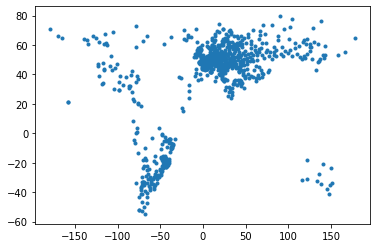

In [14]:
plt.plot(df_station['lon'],df_station['lat'],'.')
plt.show()

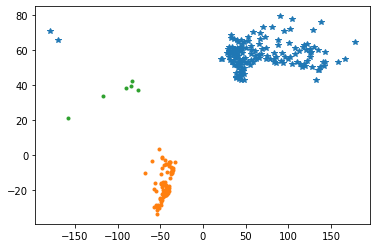

In [15]:
df_station_rs=df_station[df_station['country']=='RS']
plt.plot(df_station_rs['lon'],df_station_rs['lat'],'*')
df_station_rs=df_station[df_station['country']=='BR']
plt.plot(df_station_rs['lon'],df_station_rs['lat'],'.')
df_station_rs=df_station[df_station['usaf'].isin(['911820', '724338', '725377', '745700', '745980', '722860'])]
plt.plot(df_station_rs['lon'],df_station_rs['lat'],'.')
plt.show()

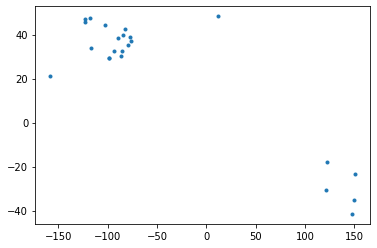

In [17]:
the_list = ['484560', '943120', '949680', '942030', '944030', '948210', '949100', '943000', '722175', '941200', '945100', '949260', '946370', '943740', '108660', '722906', '742060', '702710', '747686', '702670', '723810', '702960', '722510', '727846', '702610', '722350', '722536', '722970', '702190', '722210', '700260', '722530', '722560', '702910', '723060', '723170', '478080', '722680', '723560', '724050', '724060', '725090', '725755', '726625', '745700', '725180', '703260', '725200', '703980', '722485', '722660', '723418', '040180', '727930', '725300', '744910', '703500', '722650', '722700', '723440', '723540', '723650', '724338', '724640', '724660', '725280', '725377', '725640', '725720', '726980', '727850', '727855', '745940', '745980', '747900', '747910', '722080', '723530', '723630', '723890', '724040', '724096', '725190', '725330', '726580', '783670', '911820', '722250', '722310', '722500', '722535', '722745', '722860', '723030', '723510', '745160', '747750', '780160']
df_station_rs=df_station[df_station['usaf'].isin(the_list)]
plt.plot(df_station_rs['lon'],df_station_rs['lat'],'.')
plt.show()